In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install mtcnn


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 22.6 MB/s eta 0:00:00


In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from matplotlib.patches import Rectangle
from mtcnn.mtcnn import MTCNN

In [ ]:
# face detection with mtcnn on a photograph

# load image from file
filename = '/content/drive/MyDrive/EMOCNN/images1.jpg'
pixels = plt.imread(filename)

# create the detector, using default weights
detector = MTCNN()

# detect faces in the image
faces = detector.detect_faces(pixels)
for face in faces:
    print('\n')
    print(face)

1/1 [==============================] - 0s 155ms/step


{'box': [51, 71, 66, 88], 'confidence': 0.9999887943267822, 'keypoints': {'left_eye': (66, 106), 'right_eye': (95, 104), 'nose': (79, 123), 'mouth_left': (67, 134), 'mouth_right': (98, 133)}}


In [ ]:


# draw an image with detected objects
def draw_image_with_boxes(filename, result_list):
    # load the image
    data = plt.imread(filename)
    # plot the image
    plt.imshow(data)
    # get the context for drawing boxes
    ax = plt.gca()
    # plot each box
    for result in result_list:
        # get coordinates
        x, y, width, height = result['box']
        # create the shape
        rect = Rectangle((x, y), width, height, fill=False, color='red')
        # draw the box
        ax.add_patch(rect)
    # show the plot
    plt.axis('off')
    plt.show()



4/4 [==============================] - 0s 43ms/step


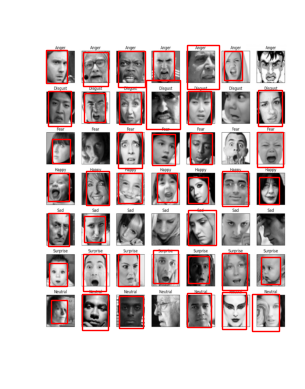

In [ ]:
filename = '/content/drive/MyDrive/EMOCNN/EMOCNN_IMAGES_page-0001.jpg'
# load image from file
pixels = plt.imread(filename)
# create the detector, using default weights
detector = MTCNN()
# detect faces in the image
faces = detector.detect_faces(pixels)
# display faces on the original image
draw_image_with_boxes(filename, faces)


In [ ]:


# draw an image with detected objects
def draw_image_with_boxes_and_features(filename, result_list):
    # load the image
    data = plt.imread(filename)
    # plot the image
    plt.imshow(data)
    # get the context for drawing boxes
    ax = plt.gca()
    # plot each box
    for result in result_list:
        # get coordinates
        x, y, width, height = result['box']
        # create the shape
        rect = Rectangle((x, y), width, height, fill=False, color='red')
        # draw the box
        ax.add_patch(rect)
        # draw the dots
        for key, value in result['keypoints'].items():
            # create and draw dot
            dot = Circle(value, radius=2, color='red')
            ax.add_patch(dot)
    # show the plot
    plt.axis('off')
    plt.show()



4/4 [==============================] - 0s 44ms/step


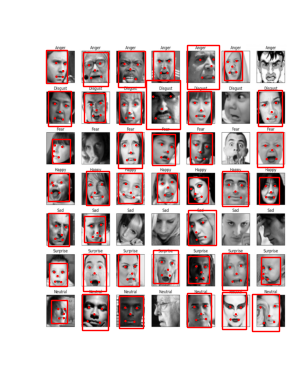

In [ ]:


filename = '/content/drive/MyDrive/EMOCNN/EMOCNN_IMAGES_page-0001.jpg'
# load image from file
pixels = plt.imread(filename)
# create the detector, using default weights
detector = MTCNN()
# detect faces in the image
faces = detector.detect_faces(pixels)
# display faces on the original image
draw_image_with_boxes_and_features(filename, faces)



4/4 [==============================] - 0s 41ms/step


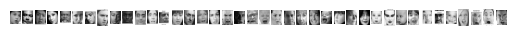

In [ ]:


# draw each face separately
def draw_faces(filename, result_list):
    # load plt image
    data = plt.imread(filename)
    # plot each face as a subplot
    for i in range(len(result_list)):
        # get coordinates
        x1, y1, width, height = result_list[i]['box']
        x2, y2 = x1 + width, y1 + height
        # define subplot
        plt.subplot(1, len(result_list), i+1)
        plt.axis('off')
        # plot face
        plt.imshow(data[y1:y2, x1:x2])
    # show the plot
    plt.show()

filename = '/content/drive/MyDrive/EMOCNN/EMOCNN_IMAGES_page-0001.jpg'
# load image from file
pixels = plt.imread(filename)
# create the detector, using default weights
detector = MTCNN()
# detect faces in the image
faces = detector.detect_faces(pixels)
# display faces on the original image
draw_faces(filename, faces)



In [ ]:


# load image from file
filename = '/content/drive/MyDrive/EMOCNN/images2.jpg'
pixels = plt.imread(filename)
# create the detector, using default weights
detector = MTCNN()
# detect faces in the image
faces = detector.detect_faces(pixels)
for face in faces:
    print(face)



1/1 [==============================] - 0s 153ms/step
{'box': [103, 26, 57, 84], 'confidence': 0.9999799728393555, 'keypoints': {'left_eye': (121, 61), 'right_eye': (147, 59), 'nose': (136, 79), 'mouth_left': (121, 86), 'mouth_right': (149, 86)}}


1/1 [==============================] - 0s 157ms/step


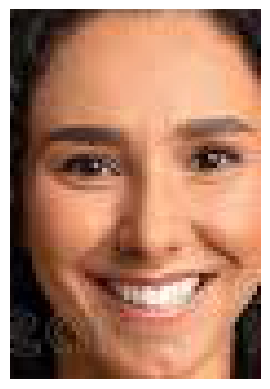

In [ ]:
confidence_cutoff = 0.99

# draw each face separately
def draw_faces(filename, result_list):
    counter = 1
    # load the image
    data = plt.imread(filename)
    # plot each face as a subplot
    for i in range(len(result_list)):
        if result_list[i]['confidence'] >= confidence_cutoff:
            # get coordinates
            x1, y1, width, height = result_list[i]['box']
            x2, y2 = x1 + width, y1 + height
            # define subplot
            plt.subplot(1, len(result_list), i+1)
            plt.axis('off')
            # plot face
            face_extract = data[y1:y2, x1:x2]
            plt.imshow(face_extract)   
            #plt.savefig(f'./saved_images/face_extract_{counter}.jpg')
            counter += 1
    # show the plot
    plt.show()

filename = '/content/drive/MyDrive/EMOCNN/images2.jpg'
# load image from file
pixels = plt.imread(filename)
# create the detector, using default weights
detector = MTCNN()
# detect faces in the image
faces = detector.detect_faces(pixels)
# display faces on the original image
draw_faces(filename, faces)